# <h> Question 1 </h>

In [5]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [44]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [45]:
print('x_train:', x_train.shape)

x_train: (50000, 32, 32, 3)


In [46]:

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

In [47]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w = std*np.random.randn(Din, K)
b = np.zeros(K)
print("w:", w.shape)
print("b:", b.shape)
print(y_train.shape)

w: (3072, 10)
b: (10,)
(50000, 10)


In [10]:
batch_size = Ntr
iterations =300
lr = 1.4e-2
lr_decay=0.9999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

In [11]:
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w)+b
    loss =1./batch_size *np.square(y_pred-y).sum()+reg*np.sum(w**2)
    loss_history.append(loss)
    if t%10 == 0:
        print('iteration %d / %d: loss %f'%(t,iterations,loss))
    dy_pred = 1./batch_size*2.0*(y_pred-y)
    db = dy_pred.sum(axis=0)
    dw = x.T.dot(dy_pred)+reg*w
    w-=lr*dw
    b-=lr*db
    lr*=lr_decay

iteration 0 / 300: loss 1.000005
iteration 10 / 300: loss 0.876444
iteration 20 / 300: loss 0.842111
iteration 30 / 300: loss 0.823045
iteration 40 / 300: loss 0.811767
iteration 50 / 300: loss 0.804806
iteration 60 / 300: loss 0.800310
iteration 70 / 300: loss 0.797251
iteration 80 / 300: loss 0.795054
iteration 90 / 300: loss 0.793387
iteration 100 / 300: loss 0.792060
iteration 110 / 300: loss 0.790959
iteration 120 / 300: loss 0.790017
iteration 130 / 300: loss 0.789191
iteration 140 / 300: loss 0.788454
iteration 150 / 300: loss 0.787787
iteration 160 / 300: loss 0.787178
iteration 170 / 300: loss 0.786618
iteration 180 / 300: loss 0.786099
iteration 190 / 300: loss 0.785617
iteration 200 / 300: loss 0.785166
iteration 210 / 300: loss 0.784744
iteration 220 / 300: loss 0.784346
iteration 230 / 300: loss 0.783971
iteration 240 / 300: loss 0.783616
iteration 250 / 300: loss 0.783280
iteration 260 / 300: loss 0.782960
iteration 270 / 300: loss 0.782656
iteration 280 / 300: loss 0.782

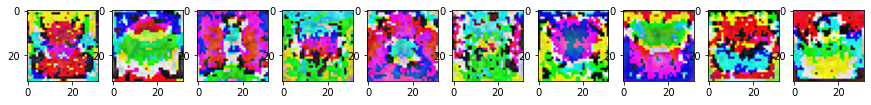

Initial Rate: 0.01358621708897951
Training Loss: 0.7818469797023437


In [12]:
f,ax = plt.subplots(1,10)
f.set_size_inches(15,15)
for i in range(10):
    sample = w[:,i].reshape(32,32,3)
    correctd = 255/(sample.max()-sample.min())*sample+255-sample.max()*(255/sample.max()-sample.min())

    ax[i].imshow((correctd).astype(np.uint8))
plt.show()
print('Initial Rate:',lr)
print('Training Loss:',loss_history[-1])


In [15]:
batch_size_test = Nte
y_eval =x_test.dot(w)+b
loss_test =1./batch_size_test *np.square(y_eval-y_test).sum()
print('Testing loss:',loss_test)

Testing loss: 0.7870811074670861


In [25]:
acuracy_test = 0
acuracy_train = 0
for yt,yev in zip(y_test,y_eval):
    if np.where(yt == yt.max()) == np.where(yev == yev.max()):
        acuracy_test+=1

for ytr,ypr in zip(y,y_pred):
    if np.where(ytr == ytr.max()) == np.where(ypr == ypr.max()):
        acuracy_train+=1

acuracyRatio = (acuracy_test/batch_size_test)*100
acuracy2 = (acuracy_train/batch_size)*100
print('Accuracy test Presentage', str(acuracyRatio)+'%')
print('Accuracy training Presentage', str(acuracy2)+'%')
    

Accuracy test Presentage 40.589999999999996%
Accuracy training Presentage 42.083999999999996%


# Question 2

In [48]:
x_t = x_train*255
H = 200
std = 1e-6
w1 = std*np.random.randn(Din,H)
w2 = std*np.random.randn(H,K)
b1 = np.zeros(H)
b2 = np.zeros(K)
lr = 1.4e-2
lr_decay = 0.99
reg = 5e-6
print("w1:",w1.shape)
print("b1:",b1.shape)
print("w2:",w2.shape)
print("b2:",b2.shape)
los_history_2 = []

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [50]:

rng = np.random.default_rng(seed=seed)
for i in range(iterations):
    indices = np.random.choice(Ntr,batch_size)
    rng.shuffle(indices)
    x = x_t[indices]
    y = y_train[indices] 
    h = 1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred_2 = h.dot(w2)+b2
    loss_2 = 1.0/batch_size*np.square(y_pred_2-y).sum() + reg*((np.sum(w2**2))+np.sum(w1**2))
    los_history_2.append(loss_2)
    if i%10 == 0:
        print('Iteration %d / %d: loss %f'%(i,iterations,loss_2))
    dy_pred_2 = 1.0/batch_size*2.0*(y_pred_2-y)
    dw2 = h.T.dot(dy_pred_2) + reg*w2
    db2 = dy_pred_2.sum(axis=0)
    dh =  dy_pred_2.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h))+reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay

Iteration 0 / 300: loss 1.000001
Iteration 10 / 300: loss 0.881351
Iteration 20 / 300: loss 0.859829
Iteration 30 / 300: loss 0.838260
Iteration 40 / 300: loss 0.830424
Iteration 50 / 300: loss 0.822555
Iteration 60 / 300: loss 0.815271
Iteration 70 / 300: loss 0.812803
Iteration 80 / 300: loss 0.804509
Iteration 90 / 300: loss 0.798509
Iteration 100 / 300: loss 0.794613
Iteration 110 / 300: loss 0.792506
Iteration 120 / 300: loss 0.789736
Iteration 130 / 300: loss 0.786559
Iteration 140 / 300: loss 0.782216
Iteration 150 / 300: loss 0.781878
Iteration 160 / 300: loss 0.777531
Iteration 170 / 300: loss 0.776930
Iteration 180 / 300: loss 0.774546
Iteration 190 / 300: loss 0.774006
Iteration 200 / 300: loss 0.773530
Iteration 210 / 300: loss 0.772912
Iteration 220 / 300: loss 0.771795
Iteration 230 / 300: loss 0.770291
Iteration 240 / 300: loss 0.767169
Iteration 250 / 300: loss 0.769402
Iteration 260 / 300: loss 0.770488
Iteration 270 / 300: loss 0.767367
Iteration 280 / 300: loss 0.768

In [ ]:
print("Initial leatning rate" ,lr )
print('Training loss:' los_history_2[-1])
